# Report Continuous Control

## Learning algorithm

Model architectures: To start, I implemented the DDPG and A2C, and than continued with the DDPG algorithm because it's performance was much better. Below, the scores are shown for 200 epochs. 

- Asynchronous Advantage Actor-Critic (Mnih et al., 2016), short for A3C, is a classic policy gradient method with a special focus on parallel training. A2C is a synchronous, deterministic version of A3C.
- DDPG (Lillicrap, et al., 2015), short for Deep Deterministic Policy Gradient, is a model-free off-policy actor-critic algorithm, combining DPG with DQN. 


### Actor-Critic methods
While there are many variants, all Actor-Critic methods are based on the concept of two neural networks, the Actor that learns the policy and Critic that learns the value function. The Critic $V(s;\theta_v)$ (or $Q(s,a)$) is trained by the TD estimate in order to learn value function $V$. The Actor $\pi(a|s;\theta_\pi)$ is trained by the Advantage function $A(s, a) = r + \gamma V(s';\theta_v - V(s;\theta_v))$, calculated from the Critic. For this reason, these methods are called Advantage Actor-Critic methods. 

### A2C vs A3C 
Two variants are A2C and A3C, in which A2C is a synchronous, deterministic version of A3C. A3C implements parallel training where multiple workers in parallel environments independently update a global value. A2C has been shown to be able to utilize GPUs more efficiently and work better with large batch sizes while achieving same or better performance than A3C.

Therefore, this will be our first benchmark. 

### A2C vs DDPG 
While the A2C algorithm is an on-policy method, the DDPG is an off-policy method. This is because, the Critic $Q(s,\mu(s;\theta_\mu); \theta_Q)$ in the DDPG is used to approximate the maximizer of Q-values of the next state, instead of a baseline. Also, the Actor $a=\mu(s;\theta_\mu)$ is deterministic and learns the best action. 


### DDPG vs D4PG
The D4PG is an improvement over the DDPG, in which Distributional Value Estimation allows the agent to not just estimate the value of a given action, but to estimate the probability of a value. It also trains multiple agents in parralel, hence Distributes the task of gaining experience. 

Unfortuenately, the internet did not contain many implementations of D4PG, which is why I choose the DDPG as the second benchmark. 

The weight update equations for the A2C and DDPG are as follows:

#### A2C
- Update Critic's weights by target:

$r+V(s')$

- Evaluate advantage function:

$A(s, a) = r + \gamma V_{\theta_v}(s’) - V_{\theta_v}(s)$



- Update Actors's weights:



$\theta_\pi \leftarrow \theta_\pi + \alpha \Sigma \nabla_{\theta} \log \pi_\theta (a|s) A(s, a)$


#### DDPG

- First, we compute the target to train the Critic ($^+$ is used for target networks):

$r + \gamma \max_{a'} Q_{\theta_Q}^+(s', \mu_{\theta_\mu}^+(s'))$


- The Actor's weights are updated by updating the determininistic policy $\mu(s)$ that gives the action, that maximizes $Q_{\theta_Q}(s,a)$:

$\theta_\pi \leftarrow \theta_\pi + \alpha \Sigma \nabla_{\theta} Q(s,\mu_\theta (s) $



In [2]:
import matplotlib.pyplot as plt

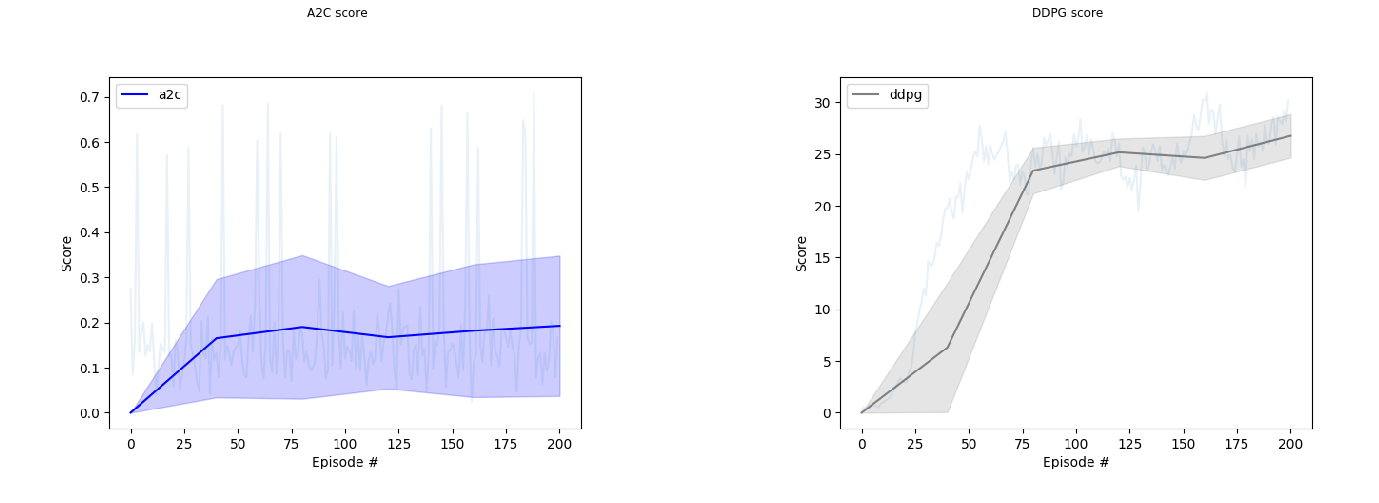

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(24,12)) 


im1 = plt.imread('plots/unity_environment_model_a2c.png')
im2 = plt.imread('plots/unity_environment_model_ddpg.png')


axs[0].axis('off')
axs[0].set_title('A2C score')
axs[0].imshow(im1)

axs[1].axis('off')
axs[1].set_title('DDPG score')
axs[1].imshow(im2)

plt.show()

As can be seen, is that neither A2C or DDPG reached the goal: An average score of +30 (over 100 consecutive episodes, and over all agents). 
The best algorithm was the DDPG and continiiung with that one, we could proceed with improving the DDPG (hyper parameters). 

### Hyperparameter

Initial hyperparameters were, which were based on [Udacity_git](https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-pendulum):
- LEARN_EVERY = 20
- BATCH_SIZE = 1024  
- ACTOR_LEARNING_RATE (learning rate of the actor) / CRITIC_LEARNING_RATE = 1e-3
- C/TAU (for soft update of target parameters) = 1e-3 
- GAMMA (discount factor) = 0.99
- NOISE_SIGMA (Ornstein-Uhlenbeck noise parameter) / NOISE_THETA = 0.2 / 0.15
- ACTOR_FC_UNITS / CRITIC_FC_UNITS = 256 

The best way would be to go for an hyper-parameter search, but this takes a lot of time (one training session already takes 30 min, so if each parameter has 3 candidate values, there will be 729 models, which takes 1.5 days to train). 

The batch size is relatively high, which may result in kill the convergence (shown in the above plot from 100 epochs onwards), as it can dilute useful experiences with non-useful experiences when the agent hasn't learned much yet. 

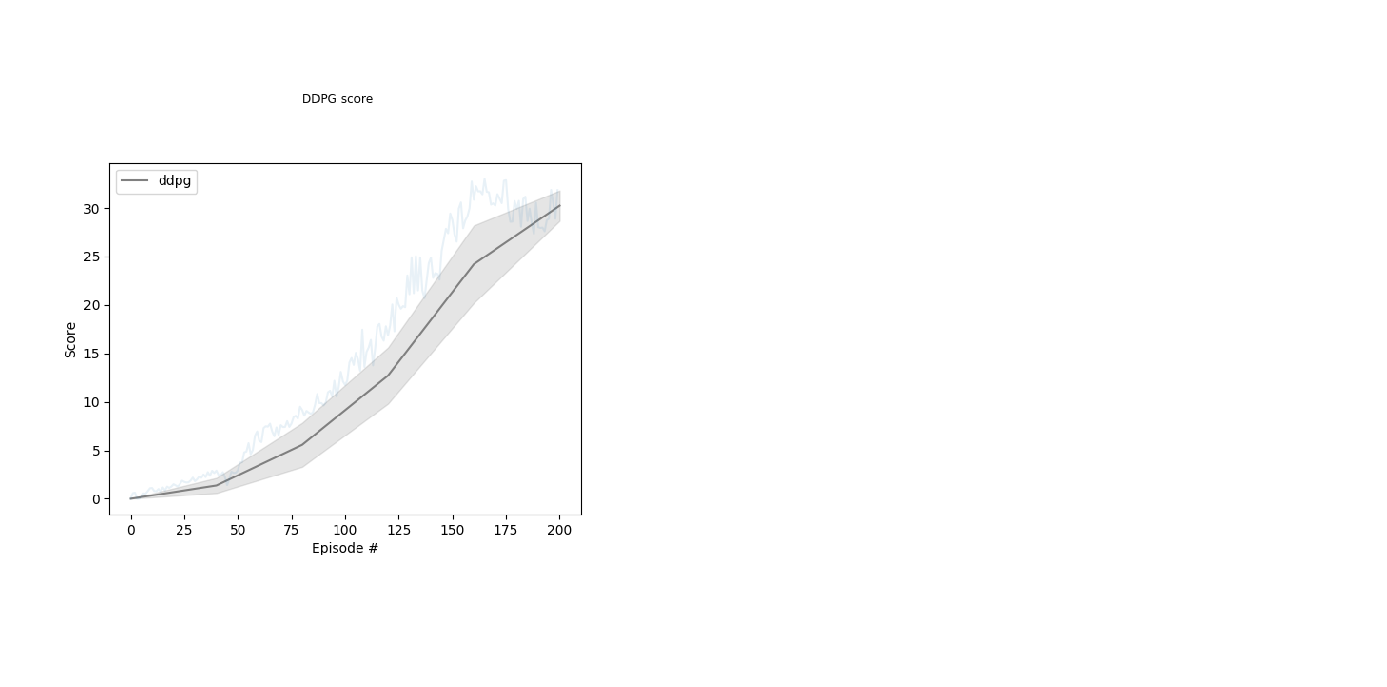

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(24,12)) 


im2 = plt.imread('plots/unity_environment_model_ddpg_batch_size_128.png')
axs[1].axis('off')

axs[0].axis('off')
axs[0].set_title('DDPG score')
axs[0].imshow(im2)

This shows, that from 100 epochs onwards the agent still learns. Let us proceed to reach a score of avarage 30 over 100 episodes. 

## Results

After 235 we are able to solve the environment! See the plot below:


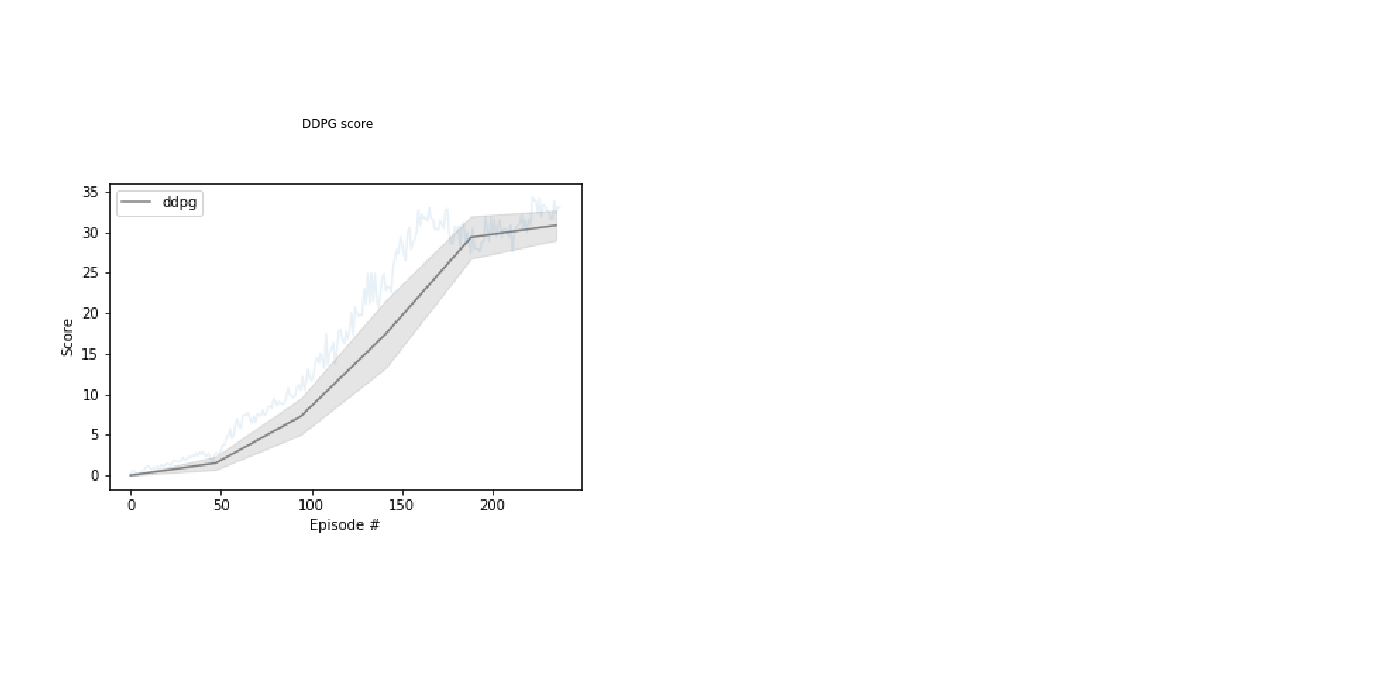

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(24,12)) 


im2 = plt.imread('unity_environment_model_ddpg_batch_size_128.png')
axs[1].axis('off')

axs[0].axis('off')
axs[0].set_title('DDPG score')
axs[0].imshow(im2)

Please see the notebook Continuous in which we achieved an avarage score of 30.01 over 100 episodes after 238 espisodes!

## Improvements

- The D4PG is an improvement over DPGG, but had limited number of git examples. The D4PG achieves superior results on benchmarks, learns very quickly and stably.
- Extensive hyper parameter search. 